셀레니움 사용을 고려하는 상황
- 비동기 통신에 의한 페이지 로딩이 힘든 경우
    - html에서 데이터를 가지고 와야 하는데 안나와
    - fetch/xhr 확인을 해봤는데 API도 없어(종종 이런 경우 있음)
- 특정 페이지의 일부분을 캡쳐를 한다거나, 파일을 다운로드 받아서 데이터를 수집한다거나 등등 사용자의 액션에 의한 데이터 수집이 필요한 경우

In [1]:
YOUTUBE_ENDGAME_VIDEO_URL = "https://www.youtube.com/watch?v=Ko2NWhXI9e8&t=10s"

In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

def get_chrome_driver():
    # 1. 브라우저 옵션 세팅
    chrome_options = webdriver.ChromeOptions()
    
    # 2. driver 생성
    driver = webdriver.Chrome(
        service= Service(ChromeDriverManager().install()),
        options=chrome_options
    )
    
    return driver

In [5]:
driver = get_chrome_driver()

In [6]:
driver.get(YOUTUBE_ENDGAME_VIDEO_URL)

In [7]:
# 스크린샷 저장
driver.save_screenshot("endgame_10s_screenshot.png")
driver.quit()

In [8]:
from selenium.webdriver.common.by import By

driver = get_chrome_driver()
driver.get(YOUTUBE_ENDGAME_VIDEO_URL)

movie_player = driver.find_element(
    By.CSS_SELECTOR,
    "#movie_player"
)

movie_player

<selenium.webdriver.remote.webelement.WebElement (session="b6b9f84fbaed0ca88fd95cb8dbeffb44", element="51329c26-b28c-4f0b-ba33-afd593cd1cac")>

In [9]:
# 영상 가운데 큰 재생버튼 눌러주기
try:
    driver.find_element(
        By.CSS_SELECTOR,
        ".ytp-large-play-button.ytp-button"
    ).click()
except:
    pass

In [10]:
# element의 위치 찾기 (좌상단 좌표 - left-top location)
location = movie_player.location
location

{'x': 24, 'y': 80}

In [11]:
# element의 크기 구하기
size = movie_player.size
size

{'height': 502, 'width': 893}

In [12]:
left = location['x']
top  = location['y']
right = left + size['width']
bottom = top + size['height']

area = (left, top, right, bottom)
area

(24, 80, 917, 582)

PIL 라이브러리를 사용
- Python Image Library
- 요즘에는 OpenCV 활용!

In [13]:
from PIL import Image as pil

In [14]:
# 스크린샷 찍기
driver.save_screenshot("./ironman_mask.png")
driver.quit()

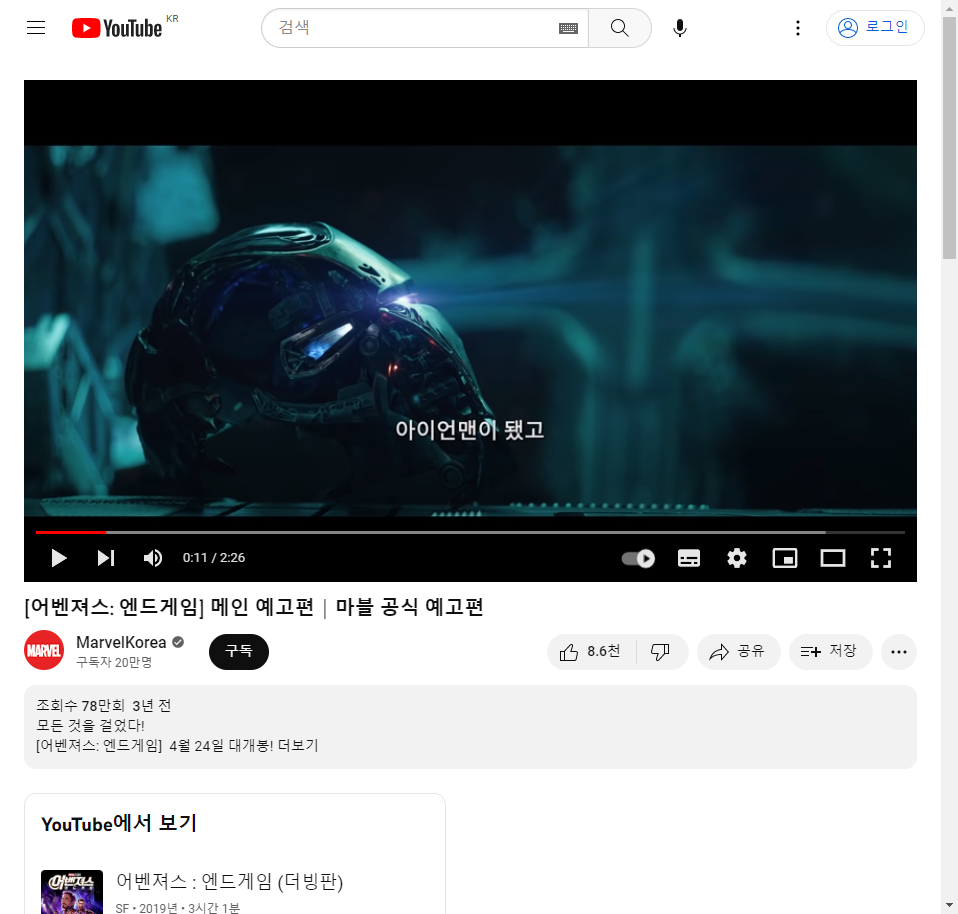

In [15]:
pil_img = pil.open("./ironman_mask.png")
pil_img

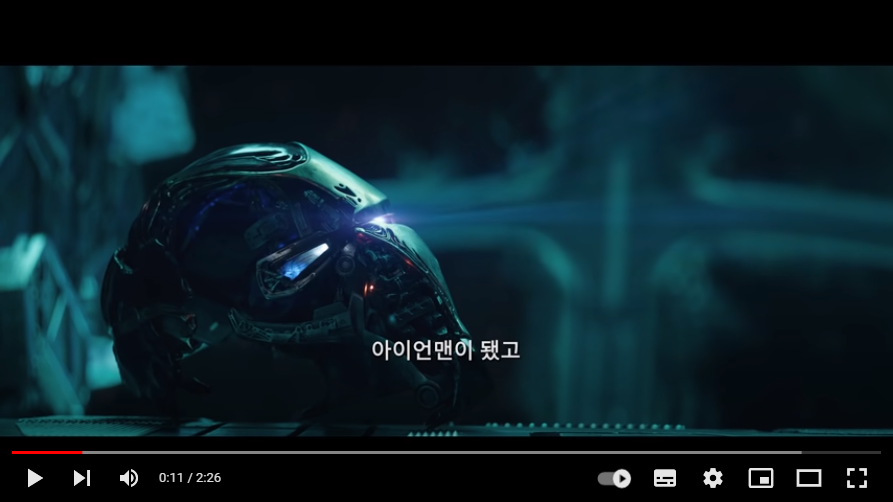

In [16]:
crop_img = pil_img.crop(area)
crop_img

In [17]:
crop_img.save("crop_ironman_mask.png")

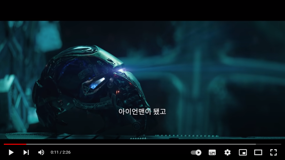

In [19]:
# 썸네일 만들기
crop_img.thumbnail((320, 160))
crop_img

Youtube 영상 다운로드

In [20]:
def download(title, link):
    response = requests.get(link, stream=True)
    save_path, size = "{}".format(title), 0
    with open(save_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                size += 1024
                f.write(chunk)
    return size

In [21]:
# Youtube에서 영상을 다운로드 받으려면 www.youtube.com~~ -> ssyoutube.com
YOUTUBE_MOVIE_DOWNLOAD_URL = "https://ssyoutube.com/watch?v=Ko2NWhXI9e8"

driver = get_chrome_driver()
driver.get(YOUTUBE_MOVIE_DOWNLOAD_URL)

In [22]:
download_button = driver.find_element(
    By.CSS_SELECTOR,
    "#sf_result > div > div > div.info-box > div.link-box > div.def-btn-box > a"
)

download_button

<selenium.webdriver.remote.webelement.WebElement (session="53808befbcf737151821642ca4a48f8e", element="fb9456e1-ffb6-4a22-91a5-48645037c92b")>

In [23]:
# 셀레니움을 통한 attribute 수집
title = download_button.get_attribute("download")
download_source = download_button.get_attribute("href")

title, download_source

('[어벤져스- 엔드게임] 메인 예고편│마블 공식 예고편.mp4',
 'https://rr2---sn-5ualdnsy.googlevideo.com/videoplayback?expire=1680170590&ei=_gklZJGMIqntzN0PltCfqA8&ip=216.131.75.71&id=o-ABxHCDcBcpzEa1k6_zhIsQkeq3zwFkvYLpYVDiAp0CEv&itag=22&source=youtube&requiressl=yes&mh=3T&mm=31%2C26&mn=sn-5ualdnsy%2Csn-vgqskne6&ms=au%2Conr&mv=m&mvi=2&pl=24&initcwndbps=1546250&spc=99c5CcwBTUPXsxy875cVK8KmaK91pbb4s9FiJTJl10d84GcHAg&vprv=1&mime=video%2Fmp4&ns=IIRXGT9ZYvGA4hknI8LjFUUM&cnr=14&ratebypass=yes&dur=146.192&lmt=1554392313399270&mt=1680148631&fvip=1&fexp=24007246&c=WEB&txp=5535432&n=QBXKoQ3aEThCpA&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cspc%2Cvprv%2Cmime%2Cns%2Ccnr%2Cratebypass%2Cdur%2Clmt&sig=AOq0QJ8wRQIhAPDIxlaL1CkQYhpY4WDrCt2oEZb0-acIXVFMdFuP8yuYAiAHMSpq8ZrqoaJGvaMvNB9o34aY1f85p072X6JJuZEwcg%3D%3D&lsparams=mh%2Cmm%2Cmn%2Cms%2Cmv%2Cmvi%2Cpl%2Cinitcwndbps&lsig=AG3C_xAwRQIgIR-B6D7RSV1oYC62suw2zIMQMEQSHfBnGbBJxNNTZ_4CIQCtQ3f1sKp9YLGiJPd2X8W1C2HtV9Vjyh4ohFHF5BpL9A%3D%3D&title=%5B%EC%96%B4%EB%B2%A4%

In [25]:
import requests

size = download(title, download_source)
size

10750976

In [27]:
print("{:.3f} Mb".format(size/1204/1024))

8.720 Mb


In [28]:
driver.quit()